# Stock Forecasting using PyAF (Python Automatic Forecasting)

https://github.com/antoinecarme/pyaf


In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyaf.ForecastEngine as autof

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Date
2017-01-03    11.43
2017-01-04    11.43
2017-01-05    11.24
2017-01-06    11.32
2017-01-09    11.49
Name: Adj Close, dtype: float64

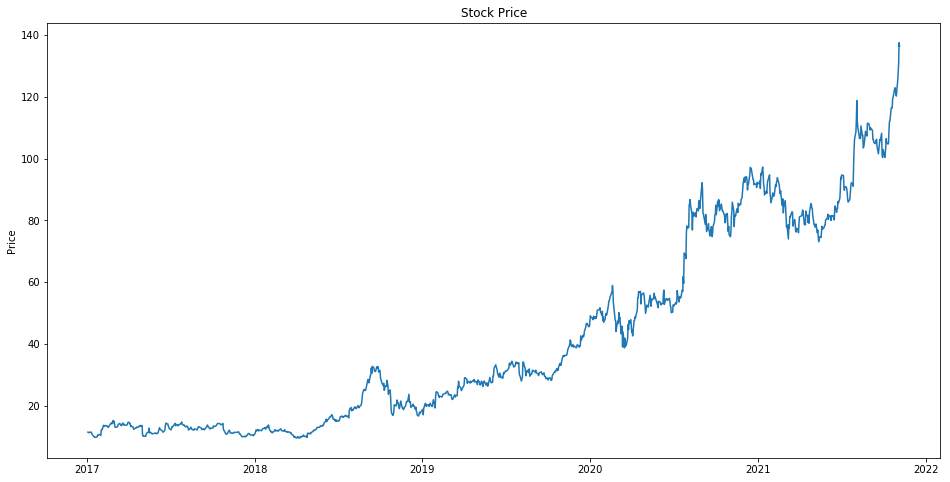

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [5]:
df = df.reset_index()
df.tail()

,Date,Adj Close
1216,2021-11-01,125.230003
1217,2021-11-02,127.629997
1218,2021-11-03,130.529999
1219,2021-11-04,137.500000
1220,2021-11-05,136.339996


In [6]:
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df, iTime = 'Date', iSignal = 'Adj Close', iHorizon = 7);
lEngine.getModelInfo()

INFO:pyaf.std:START_TRAINING 'Adj Close'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Adj Close']' 4.614002704620361
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2017-01-03T00:00:00.000000 TimeMax=2020-11-09T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Adj Close' Length=1221  Min=9.529999732971191 Max=137.5  Mean=42.16723996005422 StdDev=31.905376318970223
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Adj Close' Min=9.529999732971191 Max=137.5  Mean=42.16723996005422 StdDev=31.905376318970223
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [Lag1Trend + Cycle_None + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Adj Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE' [Cycle_None]
INFO:pyaf.std:AUTOREG_DETAIL '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 0.41911983489990234


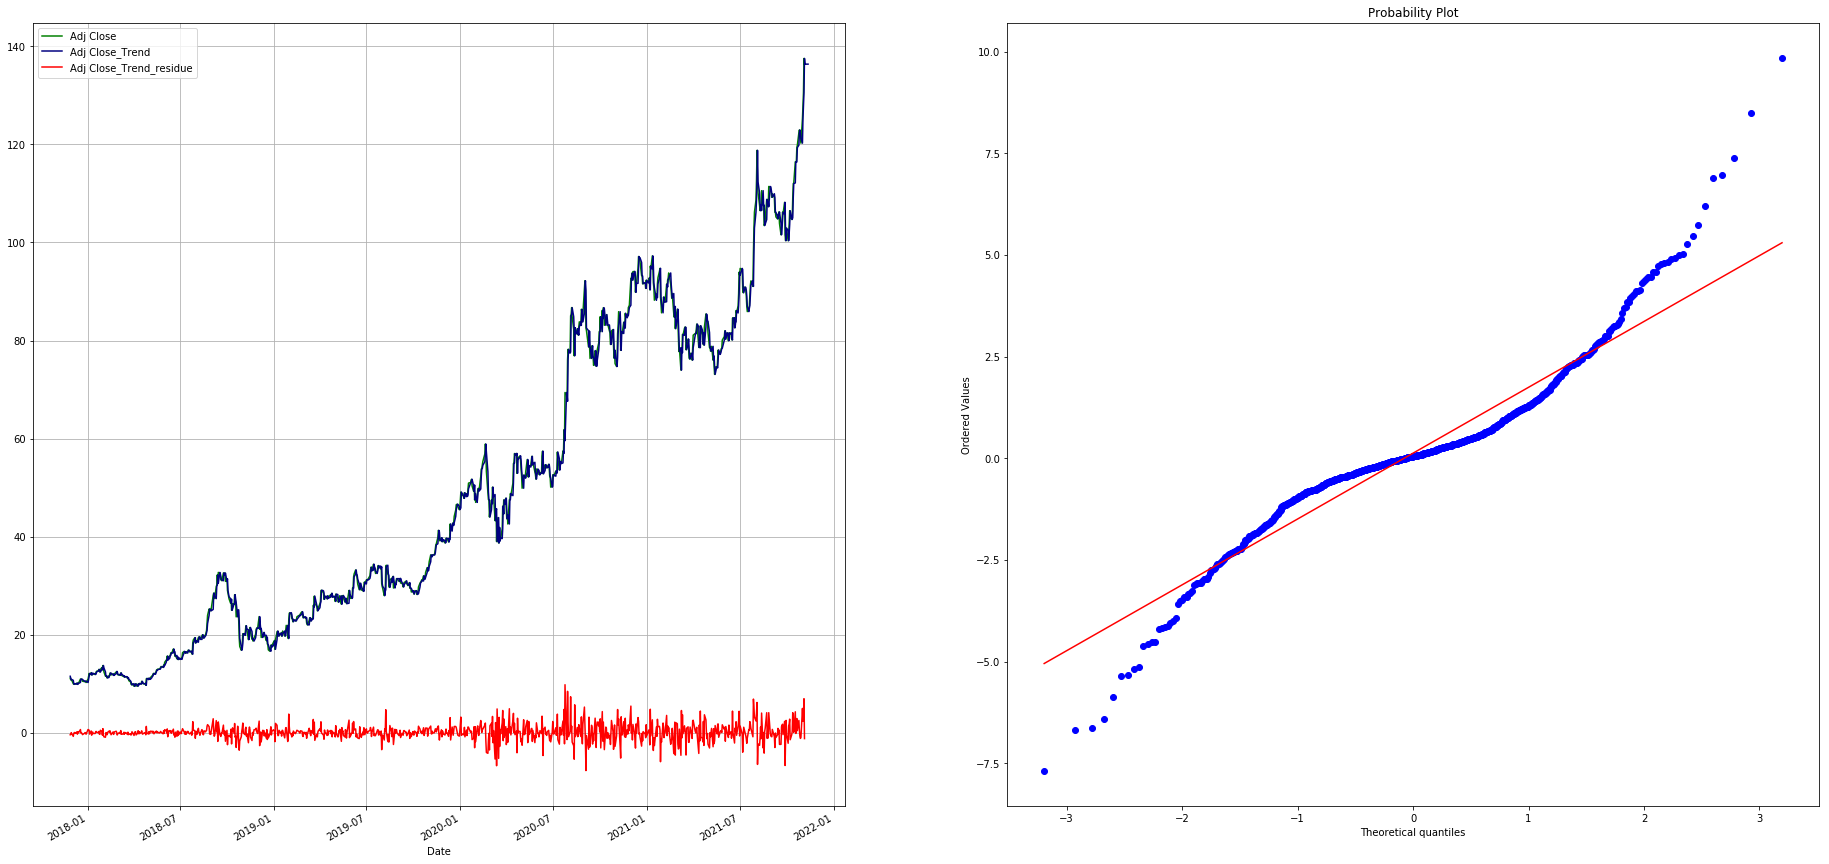

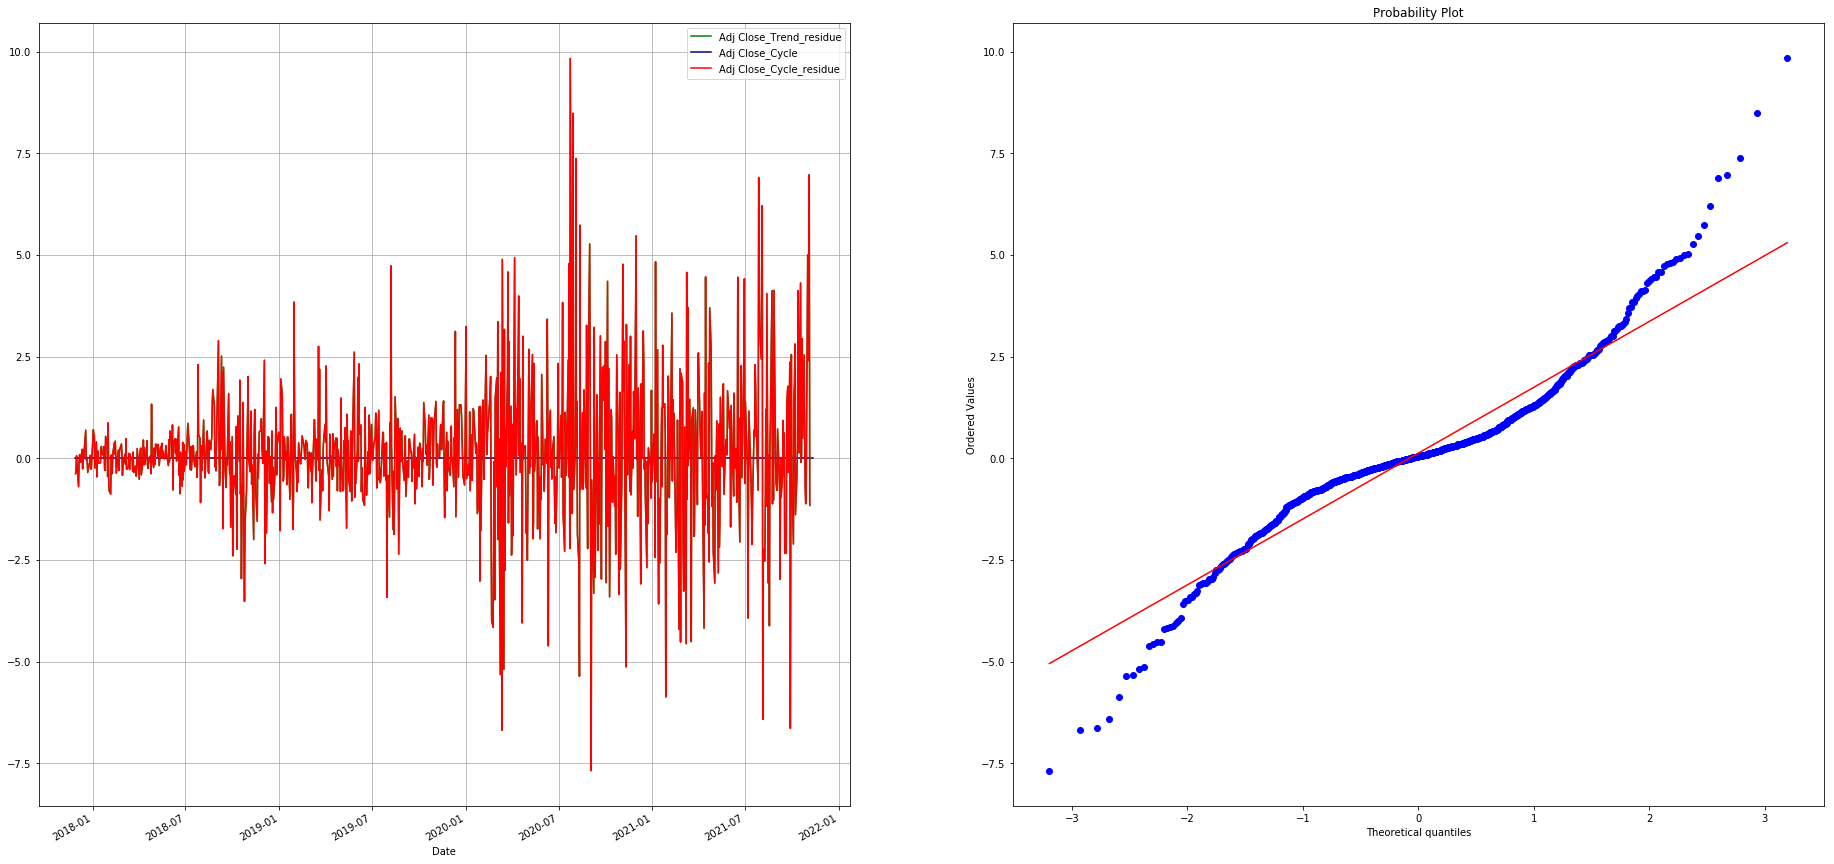

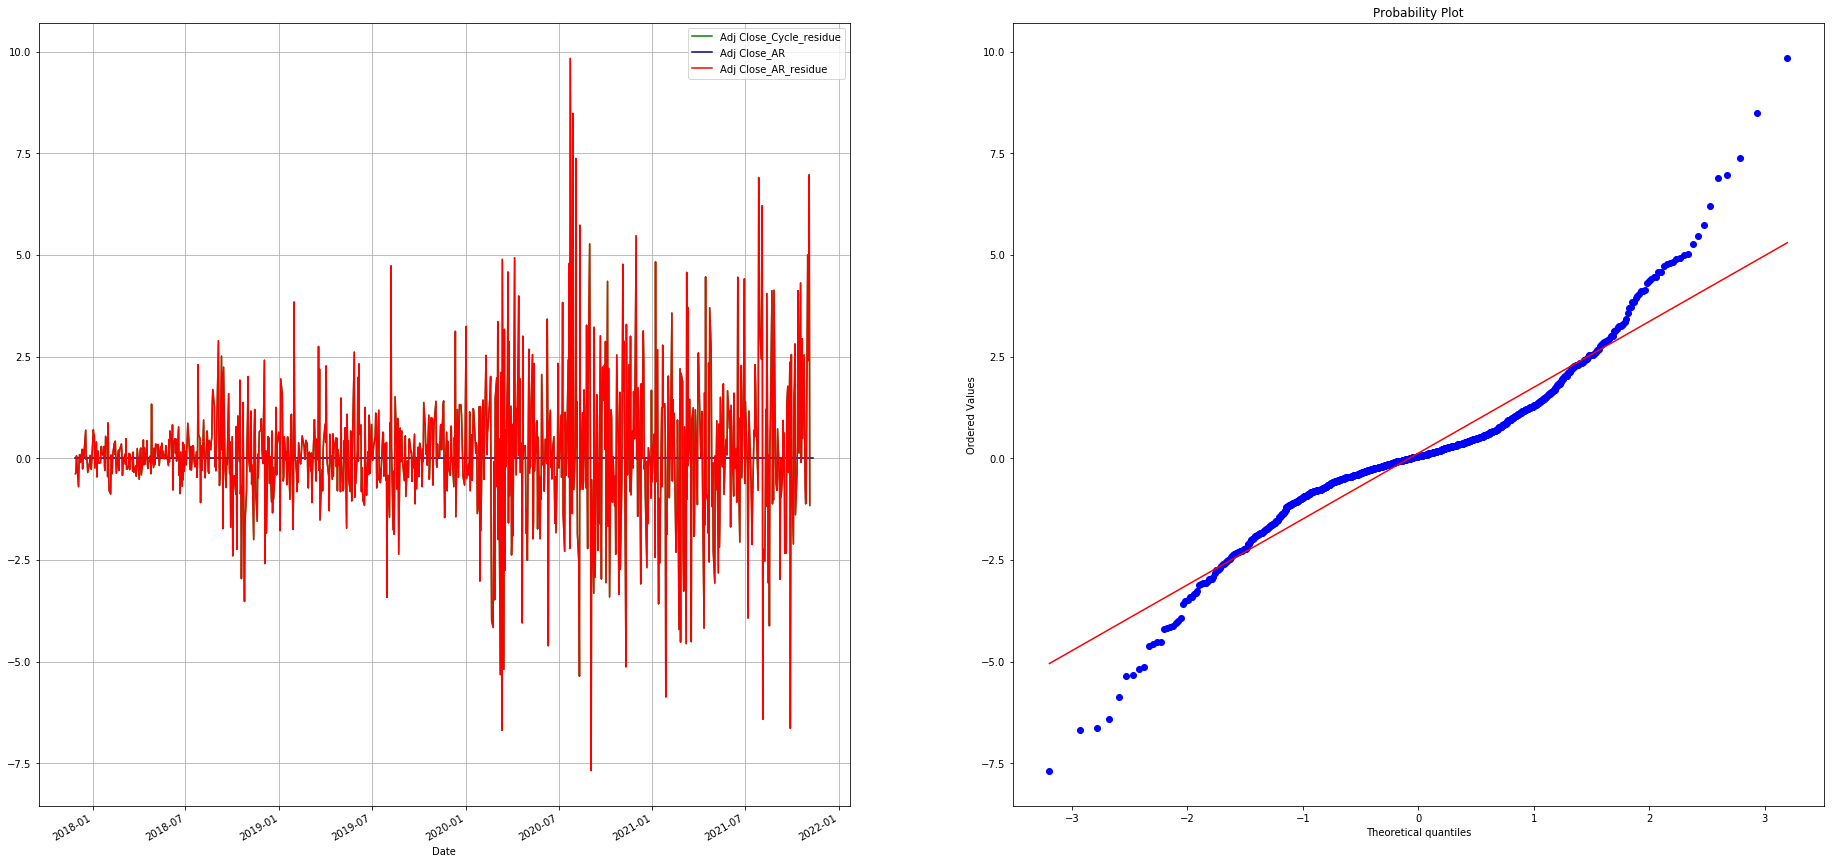

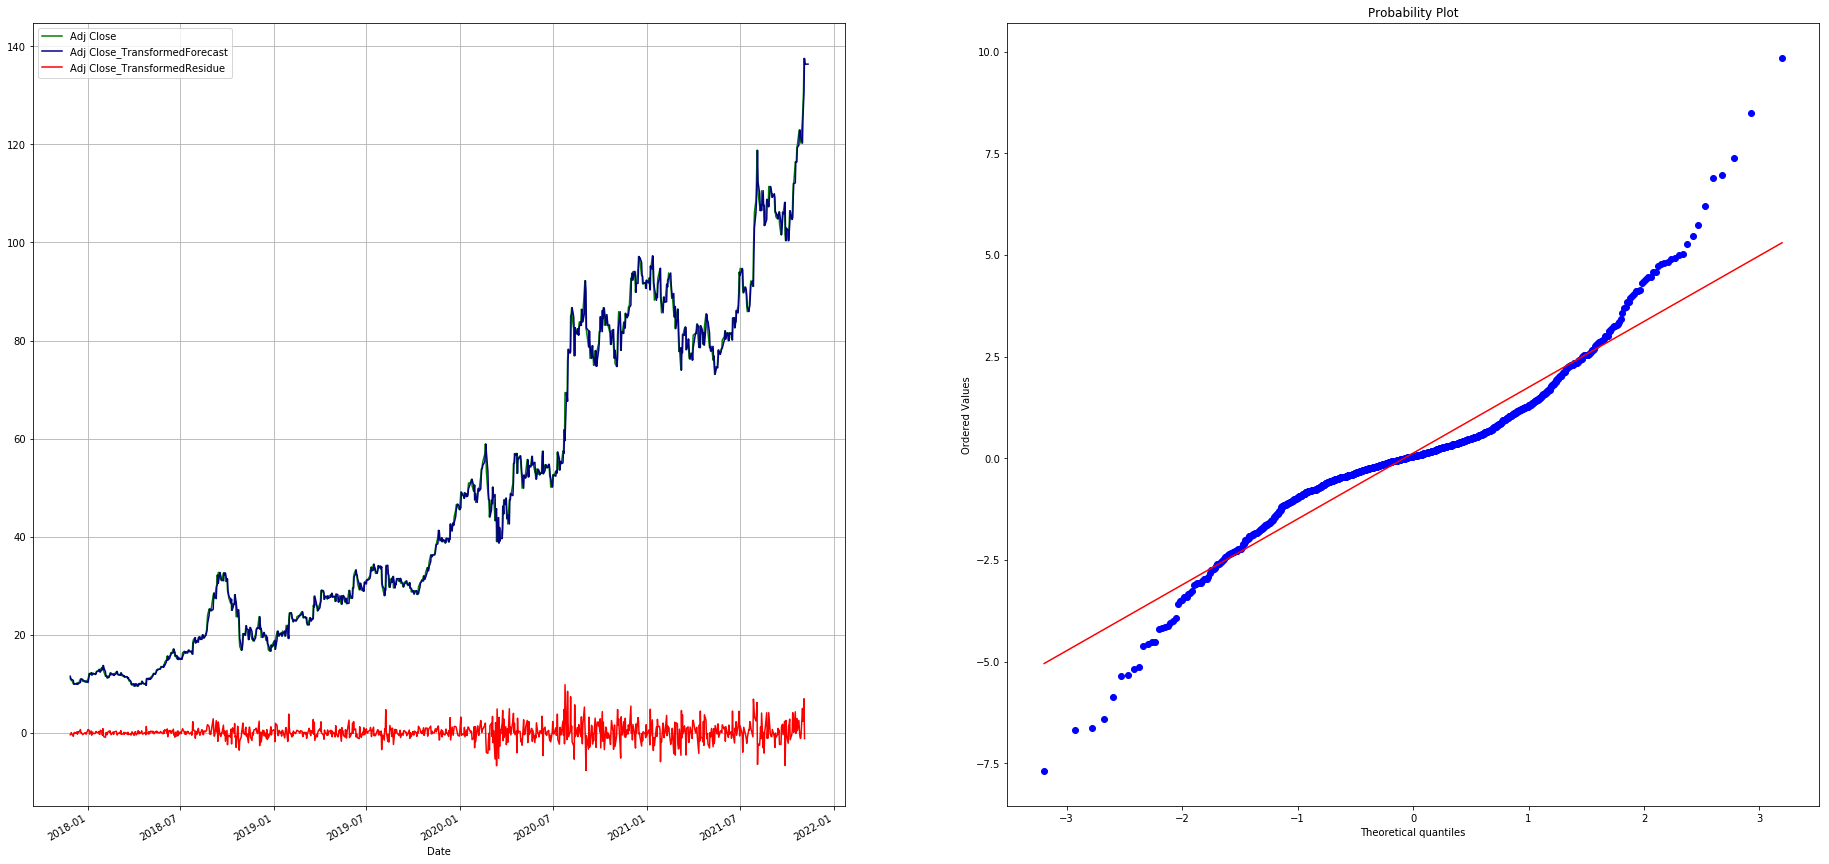

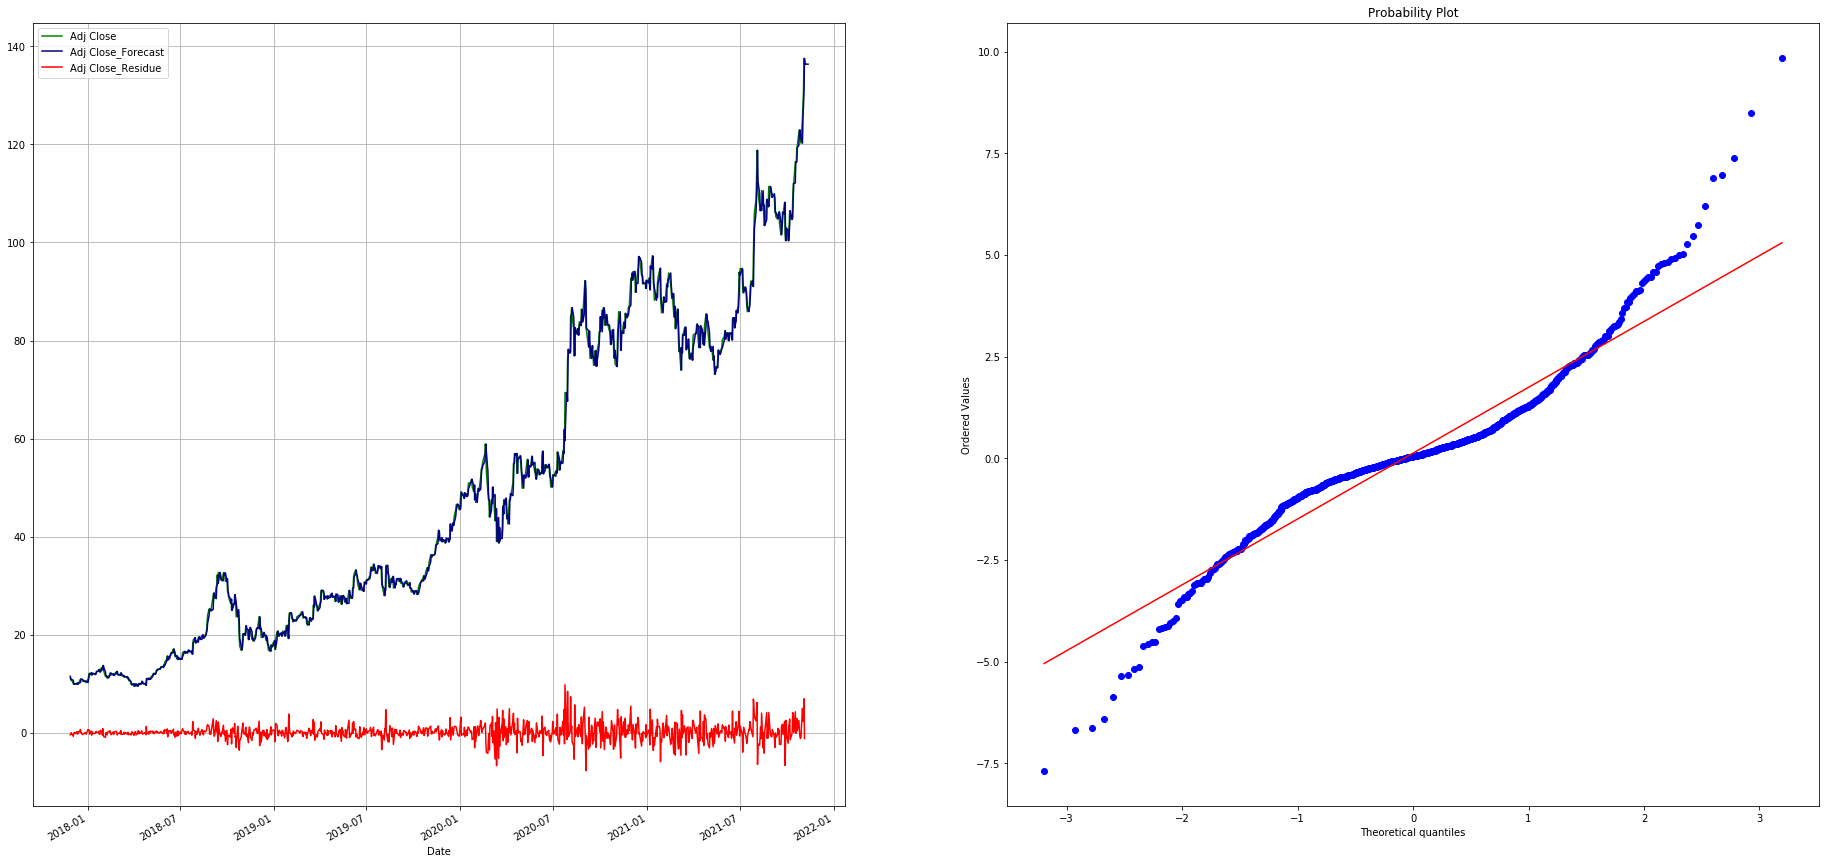

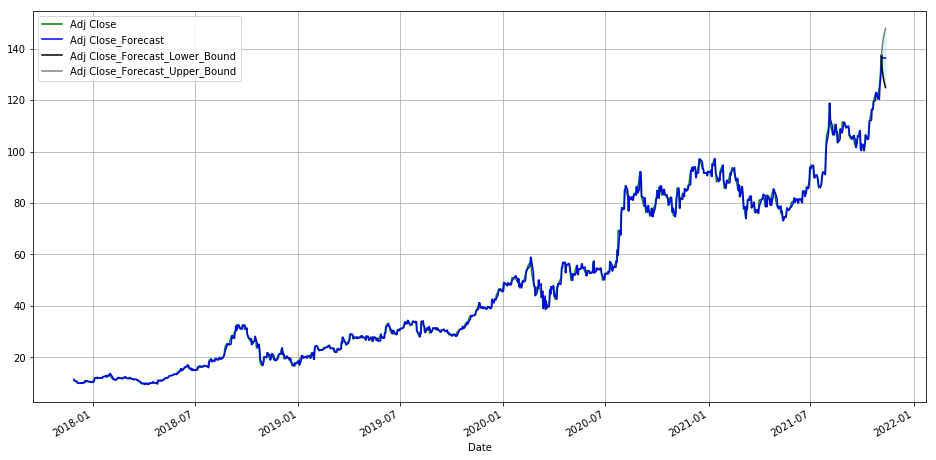

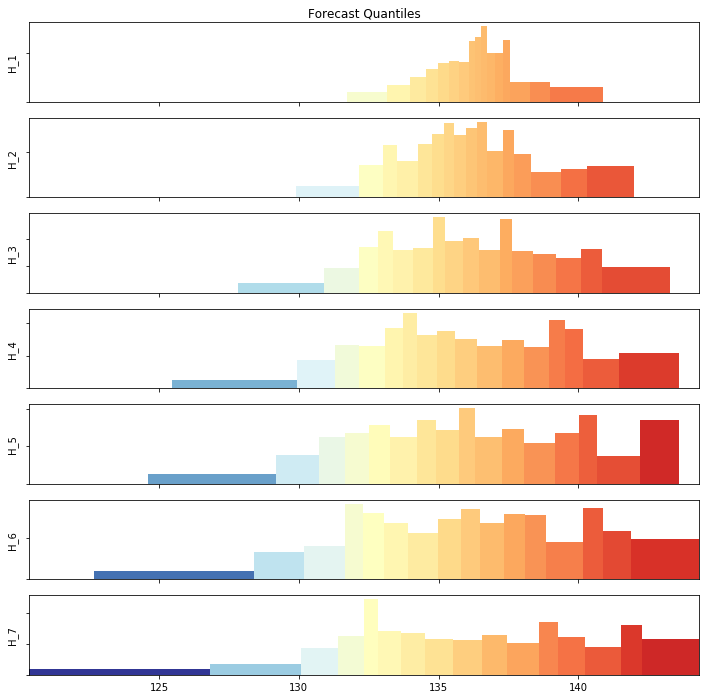

In [7]:
lEngine.standardPlots()

In [8]:
df_forecast = lEngine.forecast(iInputDS = df, iHorizon = 7)
print(df_forecast.columns)


INFO:pyaf.std:START_FORECASTING '['Adj Close']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Adj Close']' 0.10019159317016602


Index(['Date', 'Adj Close', 'row_number', 'Date_Normalized', '_Adj Close',
       '_Adj Close_Lag1Trend', '_Adj Close_Lag1Trend_residue',
       '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE',
       '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue',
       '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR',
       '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR_residue',
       '_Adj Close_Trend', '_Adj Close_Trend_residue', '_Adj Close_Cycle',
       '_Adj Close_Cycle_residue', '_Adj Close_AR', '_Adj Close_AR_residue',
       '_Adj Close_TransformedForecast', 'Adj Close_Forecast',
       '_Adj Close_TransformedResidue', 'Adj Close_Residue',
       'Adj Close_Forecast_Lower_Bound', 'Adj Close_Forecast_Upper_Bound',
       'Adj Close_Forecast_Quantile_2', 'Adj Close_Forecast_Quantile_8',
       'Adj Close_Forecast_Quantile_14', 'Adj Close_Forecast_Quantile_20',
       'Adj Close_Forecast_Quantile_26', 'Adj Close_Forecast_Quantile_32',
       'Adj Close_Fore

In [9]:
print(df_forecast['Date'].tail(7).values)


['2021-11-06T00:00:00.000000000' '2021-11-07T00:00:00.000000000'
 '2021-11-08T00:00:00.000000000' '2021-11-09T00:00:00.000000000'
 '2021-11-10T00:00:00.000000000' '2021-11-11T00:00:00.000000000'
 '2021-11-12T00:00:00.000000000']


In [10]:
df_forecast

,Date,Adj Close,row_number,Date_Normalized,_Adj Close,_Adj Close_Lag1Trend,_Adj Close_Lag1Trend_residue,_Adj Close_Lag1Trend_residue_bestCycle_byMAPE,_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue,_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR,...,Adj Close_Forecast_Quantile_44,Adj Close_Forecast_Quantile_50,Adj Close_Forecast_Quantile_56,Adj Close_Forecast_Quantile_62,Adj Close_Forecast_Quantile_68,Adj Close_Forecast_Quantile_74,Adj Close_Forecast_Quantile_80,Adj Close_Forecast_Quantile_86,Adj Close_Forecast_Quantile_92,Adj Close_Forecast_Quantile_98
0,2017-01-03,11.43,0,0.000000,11.43,11.430000,0.000000,0,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-04,11.43,1,0.000711,11.43,11.430000,0.000000,0,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-05,11.24,2,0.001422,11.24,11.430000,-0.190001,0,-0.190001,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-06,11.32,3,0.002134,11.32,11.240000,0.080000,0,0.080000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-09,11.49,4,0.004267,11.49,11.320000,0.170000,0,0.170000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,2021-11-08,NaN,1223,1.258890,NaN,136.339996,NaN,0,NaN,0.0,...,135.239598,135.860001,136.438398,137.181993,137.615598,138.380797,139.199998,140.111194,140.841595,143.273598
1224,2021-11-09,NaN,1224,1.259602,NaN,136.339996,NaN,0,NaN,0.0,...,134.939998,135.599998,136.370399,137.263202,138.051196,138.965599,139.525998,140.168396,141.460798,143.613600
1225,2021-11-10,NaN,1225,1.260313,NaN,136.339996,NaN,0,NaN,0.0,...,134.909200,135.729996,136.311598,137.261202,138.062793,139.153201,140.025993,140.665996,142.221997,143.593998
1226,2021-11-11,NaN,1226,1.261024,NaN,136.339996,NaN,0,NaN,0.0,...,134.973998,135.789993,136.484399,137.347996,138.093600,138.859591,140.181996,140.865993,141.870399,144.302397


In [11]:
df_forecast.columns

Index(['Date', 'Adj Close', 'row_number', 'Date_Normalized', '_Adj Close',
       '_Adj Close_Lag1Trend', '_Adj Close_Lag1Trend_residue',
       '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE',
       '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue',
       '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR',
       '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR_residue',
       '_Adj Close_Trend', '_Adj Close_Trend_residue', '_Adj Close_Cycle',
       '_Adj Close_Cycle_residue', '_Adj Close_AR', '_Adj Close_AR_residue',
       '_Adj Close_TransformedForecast', 'Adj Close_Forecast',
       '_Adj Close_TransformedResidue', 'Adj Close_Residue',
       'Adj Close_Forecast_Lower_Bound', 'Adj Close_Forecast_Upper_Bound',
       'Adj Close_Forecast_Quantile_2', 'Adj Close_Forecast_Quantile_8',
       'Adj Close_Forecast_Quantile_14', 'Adj Close_Forecast_Quantile_20',
       'Adj Close_Forecast_Quantile_26', 'Adj Close_Forecast_Quantile_32',
       'Adj Close_Fore

In [12]:
print(df_forecast['Adj Close_Forecast'].tail(5).values)

[136.33999634 136.33999634 136.33999634 136.33999634 136.33999634]
